<a href="https://colab.research.google.com/github/ppkk0906/Caba_nlp/blob/main/OpenCV01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## openCV
- 
- 
- 
- 

In [ ]:
#!pip install opencv-python

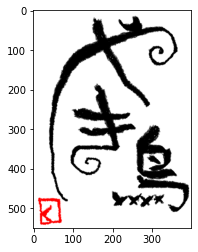

In [ ]:
import urllib.request as req
import matplotlib.pyplot as plt
import cv2

url = "http://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url, "data/facedata/sample1.png")

img = cv2.imread("data/facedata/sample1.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

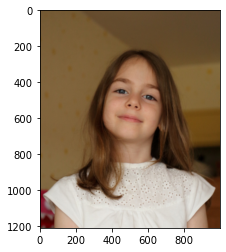

In [ ]:
filepath = "data/facedata/girl.jpg"
img = cv2.imread(filepath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(close=True)

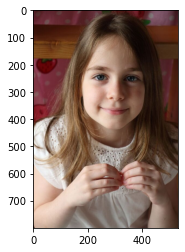

In [ ]:
filepath = "data/facedata/girl.png"
img = cv2.imread(filepath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(close=True)

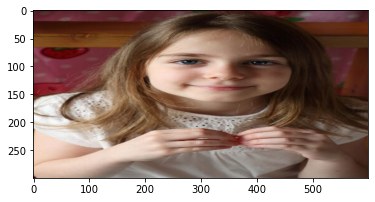

In [ ]:
filepath = "data/facedata/girl.png"
img = cv2.imread(filepath)
img2 = cv2.resize(img, (600,300))
img.resize()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show(close=True)

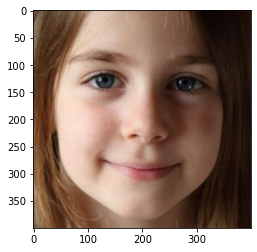

In [ ]:
img2 = cv2.imread("data/facedata/out.png")
im2 = img[150:450, 150:450]
im2 = cv2.resize(im2, (400,400))
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show(close=True)

## 캐스케이드 분류기

[캐스케이드 분류기](https://dsbook.tistory.com/164)  
[색상 공간 변환](https://076923.github.io/posts/Python-opencv-10/)

얼굴의 좌표 =  149 127 316 316


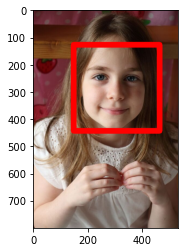

In [ ]:
cascade_file = 'data/facedata/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

filepath = 'data/facedata/girl.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))  # 얼굴 인식영역의 최소 크기

# 결과 확인
if len(face_list) == 0:
    print('얼굴 인식 실패')
    quit()
    
# 인식한 부분 표시
for (x,y,w,h) in face_list:
    print('얼굴의 좌표 = ', x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
    
# 이미지 출력
cv2.imwrite('data/facedata/face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def mosaic(img, rect, size):
    # 모자이크 할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2-x1
    h = y2-y1
    i_rect = img[y1:y2, x1:x2]
    #축소하고 확대하기
    i_small = cv2.resize(i_rect, (size,size))
    i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA) # 보간법
    #모자이크 적용
    img2 = img.copy()
    img2[y1:y2 , x1:x2] = i_mos
    return img2
    

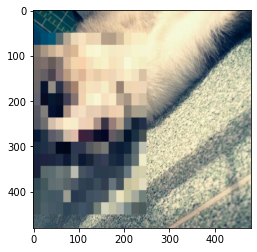

In [ ]:
img = cv2.imread("data/facedata/cat.png")
mos = mosaic(img, (0,50,250,450), 15)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

## \[과제] 사람 얼굴에 자동으로 모자이크 처리하기
### "data/facedata/family.jpg"

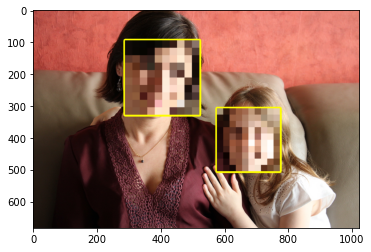

In [ ]:
img = cv2.imread("data/facedata/family.jpg")
classifier = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = classifier.detectMultiScale(img_gray, minSize=(175,175))
for (x, y, w, h) in face_list:
    color = (0,255,255)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 10)
    img = mosaic(img, (x,y,x+w,y+h), 10)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## \[과제] 여러 사람의 얼굴 자동으로 모자이크 하기

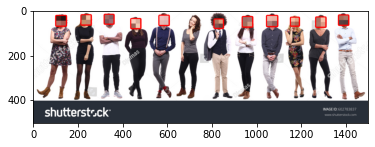

In [ ]:
img = cv2.imread("data/facedata/people.png")
classifier = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt2.xml")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = classifier.detectMultiScale(img_gray, minSize=(5, 5))
for (x,y,w,h) in face_list:
    color = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), color, 10)
    img = mosaic(img, (x, y, x+w, y+h), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
